In [1]:
#pip install auto-sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pprint import pprint

# **Ant Nuptial Flight Predictor**
---



In [3]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --disable-pip-version-check --root-user-action=ignore python-arango sklite m2cgen pipelineprofiler xgboost

In [4]:
from math import log10, floor
def round_sig(x, sig=2):
    if x == 0: return x
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [68]:
from arango import ArangoClient

# Initialize the ArangoDB client.
client = ArangoClient(hosts='http://arangodb:8529')

# Connect to "_system" database as root user.
# This returns an API wrapper for "_system" database.
# sys_db = client.db('_system', username='root', password='passwd')

# Connect to "nuptialFlight" database as root user.
# This returns an API wrapper for "nuptialFlight" database.
db = client.db('nuptialFlight', username='notebook', password='g54g54gwggsvd')

# Execute an AQL query. This returns a result cursor.
cursor = db.aql.execute(
    '''
FOR f IN flights
RETURN {
    f
}
    ''')

# Normalise all values to between 0 and 1
def normalise(low, high, value):
    return (max(low, min(high, value)) - low) / (high - low)


count = 0
#dataset = []
features = []
for row in cursor:
    if count == 0: print(row)
    count = count + 1
    #dataset.append(row['f'])
    features.append({
        #'_id': row['f']['_id'],
        'target': row['f']['flight'] == 'yes',
        #'target': row['f'].get('size', 'none'),
        'lat': round(row['f']['weather']['lat'], 0),
        'day': row['f']['weather']['daily'][0]['temp']['day'],
        #'eve': row['f']['weather']['daily'][0]['temp']['eve'],
        #'min': row['f']['weather']['daily'][0]['temp']['min'],
        #'max': row['f']['weather']['daily'][0]['temp']['max'],
        #'night': row['f']['weather']['daily'][0]['temp']['night'],
        #'morn': row['f']['weather']['daily'][0]['temp']['morn'],
        #'feelsLike': row['f']['weather']['daily'][0]['feels_like']['day'],
        'windSpeed': row['f']['weather']['daily'][0]['wind_speed'],
        #'windGust': row['f']['weather']['daily'][0]['wind_gust'],
        #'rain': row['f']['weather']['daily'][0]['pop'],
        'humid': row['f']['weather']['daily'][0]['humidity'],
        'cloud': row['f']['weather']['daily'][0]['clouds'],
        'press': row['f']['weather']['daily'][0]['pressure'],
        #'dewPoint': row['f']['weather']['daily'][0]['dew_point'],
        #'description': row['f']['weather']['daily'][0]['weather'][0]['description'],
        #'uvi': row['f']['weather']['daily'][0]['uvi'],
        
        #'day': normalise(10, 30, row['f']['weather']['daily'][0]['temp']['day']),
        #'eve': normalise(10, 30, row['f']['weather']['daily'][0]['temp']['eve']),
        #'min': normalise(5, 25, row['f']['weather']['daily'][0]['temp']['min']),
        #'max': normalise(15, 35, row['f']['weather']['daily'][0]['temp']['max']),
        #'night': normalise(5, 25, row['f']['weather']['daily'][0]['temp']['night']),
        #'morn': normalise(5, 25, row['f']['weather']['daily'][0]['temp']['morn']),
        #'feelsLike': normalise(10, 40, row['f']['weather']['daily'][0]['feels_like']['day']),
        #'windSpeed': normalise(0, 15, row['f']['weather']['daily'][0]['wind_speed']),
        #'windGust': normalise(0, 15, row['f']['weather']['daily'][0]['wind_gust']),
        #'rain': normalise(0, 1, row['f']['weather']['daily'][0]['pop']),
        #'humid': normalise(0, 100, row['f']['weather']['daily'][0]['humidity']),
        #'cloud': normalise(0, 100, row['f']['weather']['daily'][0]['clouds']),
        #'press': normalise(995, 1030, row['f']['weather']['daily'][0]['pressure']),
        #'dewPoint': normalise(-5, 25, row['f']['weather']['daily'][0]['dew_point']),
        #'description': row['f']['weather']['daily'][0]['weather'][0]['description'],
        #'uvi': normalise(0, 14, row['f']['weather']['daily'][0]['uvi']),
    })

print(len(features))
print(features[0])
#print(dataset[0])

{'f': {'_key': '8181965', '_id': 'flights/8181965', '_rev': '_e5XJLfC---', 'flight': 'yes', 'weather': {'daily': [{'dt': 1665190800, 'sunrise': 1665171041, 'sunset': 1665216671, 'moonrise': 1665210360, 'moonset': 1665168240, 'moon_phase': 0.43, 'temp': {'day': 16.37, 'min': 8.35, 'max': 16.37, 'night': 8.35, 'eve': 13.05, 'morn': 10.38}, 'feels_like': {'day': 16.07, 'night': 6.84, 'eve': 12.79, 'morn': 10.06}, 'pressure': 1014, 'humidity': 77, 'dew_point': 11.95, 'wind_speed': 5.64, 'wind_deg': 319, 'wind_gust': 7.2, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'clouds': 73, 'pop': 1, 'rain': 19.78, 'uvi': 6.05}, {'dt': 1665277200, 'sunrise': 1665257358, 'sunset': 1665303120, 'moonrise': 1665300720, 'moonset': 1665256320, 'moon_phase': 0.47, 'temp': {'day': 9.89, 'min': 3.89, 'max': 11.33, 'night': 4.66, 'eve': 10.12, 'morn': 4.15}, 'feels_like': {'day': 9.89, 'night': 4.66, 'eve': 9.46, 'morn': 2.73}, 'pressure': 1021, 'humidity': 66, 'dew_p

In [69]:
from sklearn import preprocessing

df = pd.DataFrame(data=features)

# split into input and output elements
#data = df.values
#X, y = data[:, :-1], data[:, -1]
#print(X.shape, y.shape)
print(df['target'].value_counts())

df

False    3743
True      261
Name: target, dtype: int64


,target,lat,day,windSpeed,humid,cloud,press
0,True,-35.0,16.37,5.64,77,73,1014
1,True,-35.0,16.37,5.64,77,73,1014
2,False,-35.0,16.87,5.33,71,79,1014
3,False,-35.0,16.51,5.62,76,75,1014
4,True,-35.0,16.37,5.64,77,73,1014
...,...,...,...,...,...,...,...
3999,False,13.0,23.12,9.42,59,46,1013
4000,False,-21.0,26.87,9.04,58,98,1012
4001,False,12.0,14.61,4.75,89,100,1014
4002,False,19.0,31.22,5.02,44,14,1013


In [70]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

TEMP_AVG = 16.5; # 24.00;
TEMP_STD = 10; # 3.96;
HUMIDITY_AVG = 77.00; # 62.00;
HUMIDITY_STD = 30; # 7.99;
WIND_AVG = 5.7; # 3.96;
WIND_STD = 5; # 0.78;
RAIN_AVG = 0;
RAIN_STD = 0;
CLOUD_AVG = 70;
CLOUD_STD = 30;
PRESSURE_AVG = 1014; # 1020;
PRESSURE_STD = 14.85;
RADIATION_AVG = 225.7; # (J.cm-2.h-1)
RADIATION_STD = 19.5; # SE not SD
UVI_AVG = 6.1;
UVI_STD = 6;

def true_temp(temp):
    return max(0, min(0.5, norm.cdf(-abs(temp - TEMP_AVG) / TEMP_STD))) * 2

def true_humidity(humidity):
    return max(0, min(0.5, norm.cdf(-abs(humidity - HUMIDITY_AVG) / HUMIDITY_STD))) * 2

def true_wind(windSpeed):
    return max(0, min(0.5, norm.cdf(-abs(windSpeed - WIND_AVG) / WIND_STD))) * 2

def true_rain(pop):
    return 1.0 - pop

def true_cloud(cloud):
    return max(0, min(0.5, norm.cdf(-abs(cloud - CLOUD_AVG) / CLOUD_STD))) * 2

def true_pressure(pressure):
    return max(0, min(0.5, norm.cdf(-abs(pressure - PRESSURE_AVG) / PRESSURE_STD))) * 2

def true_uvi(uvi):
    return max(0, min(0.5, norm.cdf(-abs(uvi - UVI_AVG) / UVI_STD))) * 2

def true_dewPoint(dewPoint):
    return 1

def true_lat(lat):
    return 1

def map_true_fun(X, function):
    return list(map(function, X))

In [71]:
#df = df.assign(deltaDay = lambda x: true_temp(x.day))
#df = df.assign(deltaWind = lambda x: true_wind(x.windSpeed))
#df = df.assign(deltaHumid = lambda x: true_humidity(x.humid))
#df = df.assign(deltaCloud = lambda x: true_cloud(x.cloud))
#df = df.assign(deltaPress = lambda x: true_pressure(x.press))

for i in range(len(df)):
    df.loc[i, "deltaDay"]   = round(true_temp(df.iloc[i]["day"]), 1)
    df.loc[i, "deltaWind"]  = round(true_wind(df.iloc[i]["windSpeed"]), 1)
    df.loc[i, "deltaHumid"] = round(true_humidity(df.iloc[i]["humid"]), 1)
    df.loc[i, "deltaCloud"] = round(true_cloud(df.iloc[i]["cloud"]), 1)
    df.loc[i, "deltaPress"] = round(true_pressure(df.iloc[i]["press"]), 1)

print(df['target'].value_counts())
df

False    3743
True      261
Name: target, dtype: int64


,target,lat,day,windSpeed,humid,cloud,press,deltaDay,deltaWind,deltaHumid,deltaCloud,deltaPress
0,True,-35.0,16.37,5.64,77,73,1014,1.0,1.0,1.0,0.9,1.0
1,True,-35.0,16.37,5.64,77,73,1014,1.0,1.0,1.0,0.9,1.0
2,False,-35.0,16.87,5.33,71,79,1014,1.0,0.9,0.8,0.8,1.0
3,False,-35.0,16.51,5.62,76,75,1014,1.0,1.0,1.0,0.9,1.0
4,True,-35.0,16.37,5.64,77,73,1014,1.0,1.0,1.0,0.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3999,False,13.0,23.12,9.42,59,46,1013,0.5,0.5,0.5,0.4,0.9
4000,False,-21.0,26.87,9.04,58,98,1012,0.3,0.5,0.5,0.4,0.9
4001,False,12.0,14.61,4.75,89,100,1014,0.9,0.8,0.7,0.3,1.0
4002,False,19.0,31.22,5.02,44,14,1013,0.1,0.9,0.3,0.1,0.9


In [72]:
# force the column's string column B to type 'category'  
df['target'] = df['target'].astype('category')
# define the valid categories: 
df['target'] = df['target'].cat.set_categories([True, False], ordered=True) 
#pandas dataframe sort_values to inflicts order on your categories 
df.sort_values(['target'], inplace=True, ascending=True) 


In [73]:
#check null values in the dataset
df.isnull().sum()

target        0
lat           0
day           0
windSpeed     0
humid         0
cloud         0
press         0
deltaDay      0
deltaWind     0
deltaHumid    0
deltaCloud    0
deltaPress    0
dtype: int64

In [74]:
# Use the original numbers for acccurate probability calculations
X = df.drop(['target','day','windSpeed','humid','cloud','press',], axis=1)
y = df['target']
df['target'].value_counts()

False    3743
True      261
Name: target, dtype: int64

In [75]:
# dropping duplicates keeps first
df.drop_duplicates(['lat','deltaDay','deltaWind','deltaHumid','deltaCloud','deltaPress'], inplace=True) 

print(df['target'].value_counts())
df

False    2876
True      255
Name: target, dtype: int64


,target,lat,day,windSpeed,humid,cloud,press,deltaDay,deltaWind,deltaHumid,deltaCloud,deltaPress
0,True,-35.0,16.37,5.64,77,73,1014,1.0,1.0,1.0,0.9,1.0
2753,True,-27.0,29.98,5.98,53,65,1009,0.2,1.0,0.4,0.9,0.7
840,True,41.0,19.64,2.41,48,3,1020,0.8,0.5,0.3,0.0,0.7
3258,True,-28.0,27.34,5.05,46,1,1010,0.3,0.9,0.3,0.0,0.8
3673,True,10.0,28.45,1.95,75,100,1009,0.2,0.5,0.9,0.3,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,False,-38.0,20.25,3.79,48,61,1024,0.7,0.7,0.3,0.8,0.5
1414,False,-26.0,22.56,8.46,58,0,1013,0.5,0.6,0.5,0.0,0.9
1415,False,14.0,30.91,2.49,45,30,1013,0.1,0.5,0.3,0.2,0.9
1403,False,12.0,22.41,1.31,63,100,1016,0.6,0.4,0.6,0.3,0.9


In [76]:
#df['target'].hist()

In [77]:
from sklearn.utils import resample
healthy   = df[df["target"] != False]
unhealthy = df[df["target"] == False]

In [78]:
#healthy.head()

In [79]:
up_sampled = resample(healthy, replace=True, n_samples=len(unhealthy))

In [80]:
up_sampled = pd.concat([up_sampled, unhealthy])
#check updated class counts
up_sampled['target'].value_counts()

True     2876
False    2876
Name: target, dtype: int64

In [81]:
X1 = up_sampled.drop(['target','day','windSpeed','humid','cloud','press',], axis=1)
y1 = up_sampled['target']

X1

,lat,deltaDay,deltaWind,deltaHumid,deltaCloud,deltaPress
2536,15.0,0.2,0.7,0.7,0.4,0.8
356,4.0,0.1,0.5,0.4,0.4,0.8
607,41.0,0.8,0.8,0.4,0.1,0.5
1956,43.0,0.5,0.7,0.8,0.3,0.5
324,-34.0,0.5,0.9,0.8,0.5,0.8
...,...,...,...,...,...,...
1413,-38.0,0.7,0.7,0.3,0.8,0.5
1414,-26.0,0.5,0.6,0.5,0.0,0.9
1415,14.0,0.1,0.5,0.3,0.2,0.9
1403,12.0,0.6,0.4,0.6,0.3,0.9


In [82]:
corr_matrix = X1.corr()
print(corr_matrix['deltaDay'].sort_values(ascending=False))
print()
print(corr_matrix['deltaWind'].sort_values(ascending=False))
print()
print(corr_matrix['deltaHumid'].sort_values(ascending=False))
print()
print(corr_matrix['deltaCloud'].sort_values(ascending=False))
print()
print(corr_matrix['deltaPress'].sort_values(ascending=False))
corr_matrix

deltaDay      1.000000
lat           0.071607
deltaHumid    0.032605
deltaCloud   -0.006907
deltaWind    -0.112267
deltaPress   -0.125597
Name: deltaDay, dtype: float64

deltaWind     1.000000
deltaPress    0.053992
deltaCloud    0.009584
deltaHumid   -0.073014
deltaDay     -0.112267
lat          -0.227585
Name: deltaWind, dtype: float64

deltaHumid    1.000000
deltaCloud    0.294750
lat           0.162575
deltaDay      0.032605
deltaPress   -0.020090
deltaWind    -0.073014
Name: deltaHumid, dtype: float64

deltaCloud    1.000000
deltaHumid    0.294750
deltaWind     0.009584
deltaPress    0.003127
deltaDay     -0.006907
lat          -0.026345
Name: deltaCloud, dtype: float64

deltaPress    1.000000
deltaWind     0.053992
deltaCloud    0.003127
deltaHumid   -0.020090
lat          -0.099251
deltaDay     -0.125597
Name: deltaPress, dtype: float64


,lat,deltaDay,deltaWind,deltaHumid,deltaCloud,deltaPress
lat,1.000000,0.071607,-0.227585,0.162575,-0.026345,-0.099251
deltaDay,0.071607,1.000000,-0.112267,0.032605,-0.006907,-0.125597
deltaWind,-0.227585,-0.112267,1.000000,-0.073014,0.009584,0.053992
deltaHumid,0.162575,0.032605,-0.073014,1.000000,0.294750,-0.020090
deltaCloud,-0.026345,-0.006907,0.009584,0.294750,1.000000,0.003127
deltaPress,-0.099251,-0.125597,0.053992,-0.020090,0.003127,1.000000


In [83]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((4314, 6), (1438, 6), (4314,), (1438,))

In [84]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV

# define the model
automl = XGBClassifier() #tree_method='hist', eta=0.2, alpha=3,)

# fit the model on the whole dataset
automl.fit(X1_train, y1_train)

# calibrate
calibrated = CalibratedClassifierCV(base_estimator=automl, n_jobs=-1, ensemble=True)
calibrated.fit(X1_train, y1_train)

# show tree
#r = export_text(automl, feature_names=X1_train.columns.array, show_weights=True)
#print(r)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None,
                                                    feature_types=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    in

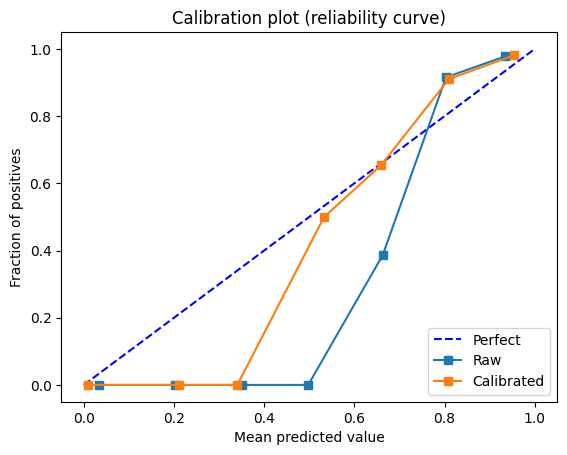

In [85]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfect")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

prob_pos_rfc = automl.predict_proba(X1_test)[:, 1]
fraction_of_positives_rfc, mean_predicted_value_rfc = calibration_curve(y1_test, prob_pos_rfc, n_bins=7)
ax.plot(mean_predicted_value_rfc, fraction_of_positives_rfc, "s-", label="%s" % ('Raw'))

prob_pos_lr = calibrated.predict_proba(X1_test)[:, 1]
fraction_of_positives_lr, mean_predicted_value_lr = calibration_curve(y1_test, prob_pos_lr, n_bins=7)
ax.plot(mean_predicted_value_lr, fraction_of_positives_lr, "s-", label="%s" % ('Calibrated'))

ax.legend(loc="lower right")
plt.show()

In [86]:
#automl.refit(X1_train.copy(), y1_train.copy())

In [87]:
#print(automl.sprint_statistics())

In [88]:
#automl.leaderboard()

In [89]:
#automl.leaderboard(detailed = True, ensemble_only=False)

In [90]:
#automl.show_models()

In [91]:
#automl.get_models_with_weights()

In [92]:
automl.score(X1_train, y1_train)

0.9853963838664812

In [93]:
automl.score(X1_test, y1_test)

0.9554937413073713

True Positive(TP)  =  727
False Positive(FP) =  0
True Negative(TN)  =  647
False Negative(FN) =  64


<AxesSubplot: >

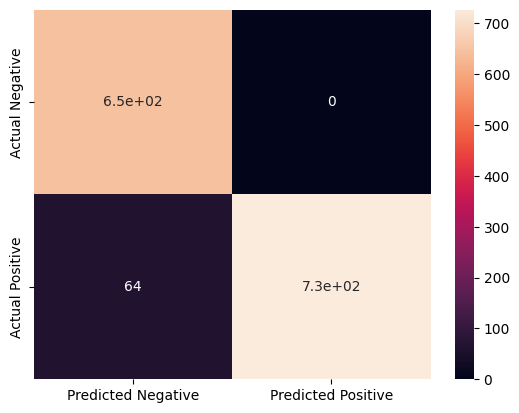

In [94]:
# Score of the final ensemble
from sklearn.metrics import confusion_matrix, accuracy_score
y1_pred = automl.predict(X1_test)
conf_matrix = confusion_matrix(y1_pred, y1_test)

TN, FP, FN, TP = conf_matrix.ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

sns.heatmap(conf_matrix, annot=True, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

pred = automl.predict(X1_test)
m2_acc_score = accuracy_score(y1_test, y1_pred)
print("Test Accuracy score  {0}".format(m2_acc_score))
m2_test_f1 = f1_score(y1_test, y1_pred)
print(f"Test F1-Score        {m2_test_f1}")

Test Accuracy score  0.9554937413073713
Test F1-Score        0.9578392621870884


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

       False       1.00      0.91      0.95       711
        True       0.92      1.00      0.96       727

    accuracy                           0.96      1438
   macro avg       0.96      0.95      0.96      1438
weighted avg       0.96      0.96      0.96      1438



In [97]:
import pickle
# save the model 
filename = 'final_model8.sav' 
pickle.dump(automl, open(filename, 'wb'))

In [98]:
#load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X1_test, y1_test)
print(result)

0.9554937413073713


In [99]:
import os
import joblib
# save the model 
joblib.dump(automl, filename)
print(f"Model size: {np.round(os.path.getsize(filename) / 1024 / 1024, 2) } MB")

Model size: 0.27 MB


In [100]:
# define one new data instance
#Xsample = {'day': 0.30, 'eve': 0.15, 'min': 0.16, 'max': 0.07, 'night': 0.18, 'morn': 0.27, 'feelsLike': 0.20, 'windSpeed': 0.38, 'windGust': 0.48, 'rain': 0.99, 'humid': 0.76, 'cloud': 0.99, 'press': 0.54, 'dewPoint': 0.57, 'uvi': 0.43}
#Xsample = {'lat': -35.1968, 'day': 16.37, 'eve': 13.05, 'min': 8.35, 'max': 16.37, 'night': 8.35, 'morn': 10.38, 'feelsLike': 16.07, 'windSpeed': 5.64, 'windGust': 7.2, 'rain': 1, 'humid': 77, 'cloud': 73, 'press': 1014, 'dewPoint': 11.95, 'uvi': 6.05}
#Xsample = {'lat': -35.0, 'day': 22, 'eve': 18, 'min': 13, 'max': 23, 'night': 16, 'morn': 17, 'feelsLike': 23, 'windSpeed': 4, 'windGust': 4, 'rain': 0, 'humid': 70, 'cloud': 0, 'press': 1010, 'dewPoint': 18.43, 'uvi': 6}
Xsample = {'lat': -35.2, 'day': 16.4, 'eve': 13.1, 'min': 8.3, 'max': 16.4, 'night': 8.4, 'morn': 10.5, 'feelsLike': 16.1, 'windSpeed': 5.7, 'windGust': 7.1, 'rain': 0.95, 'humid': 77, 'cloud': 74, 'press': 1013, 'dewPoint': 12.0, 'uvi': 6.1}
#print(Xsample)

Xsample["deltaDay"] = true_temp(Xsample["day"])
Xsample["deltaWind"] = true_wind(Xsample["windSpeed"])
Xsample["deltaHumid"] = true_humidity(Xsample["humid"])
Xsample["deltaCloud"] = true_cloud(Xsample["cloud"])
Xsample["deltaPress"] = true_pressure(Xsample["press"])


Xtest = [Xsample]
Xnew = pd.DataFrame(data=Xtest, columns=X1_train.columns)
#print(Xnew)

# make a prediction
print(automl.predict(Xnew)[0])

# make a prediction
print(automl.predict_proba(Xnew)[0][1])
print(calibrated.predict_proba(Xnew)[0][1])

# get decision path
#print(automl.decision_path(Xnew))

# show the inputs and predicted outputs
Xnew

1
0.9577345
0.8463150024414062


,lat,deltaDay,deltaWind,deltaHumid,deltaCloud,deltaPress
0,-35.2,0.992021,1.0,1.0,0.89393,0.946311


In [101]:
def chart_parameter(title, parameter, true_fun, pMin, pMax):   
    Xtest = []
    for i in np.linspace(pMin, pMax, 100):
        XsampleCopy = Xsample.copy()
        XsampleCopy[parameter] = i
        XsampleCopy["deltaDay"] = true_temp(XsampleCopy["day"])
        XsampleCopy["deltaWind"] = true_wind(XsampleCopy["windSpeed"])
        XsampleCopy["deltaHumid"] = true_humidity(XsampleCopy["humid"])
        XsampleCopy["deltaCloud"] = true_cloud(XsampleCopy["cloud"])
        XsampleCopy["deltaPress"] = true_pressure(XsampleCopy["press"])
        Xtest.append(XsampleCopy)

    Xnew = pd.DataFrame(data=Xtest, columns=X1_train.columns)
    #print(Xnew)

    n_samples = 0
    degrees = [1]

    #X = np.sort(np.random.rand(n_samples))
    #y = true_fun(X) + np.random.randn(n_samples) * 0.1
    #y = map_true_fun(X, true_fun)

    plt.figure(figsize=(14, 4))
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i + 1)
        #plt.setp(ax, xticks=())

        X_test = np.linspace(pMin, pMax, 100)
        #prediction = automl.predict_proba(Xnew)
        prediction = [item[1] for item in automl.predict_proba(Xnew)]
        plt.plot(X_test, prediction, label="Model")
        plt.plot(X_test, map_true_fun(X_test, true_fun), label="App")
        #plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
        plt.xlabel("Parameter")
        plt.ylabel("Confidence")
        plt.xlim((pMin, pMax))
        plt.ylim((-0.05, 1.05))
        plt.legend(loc="best")
        plt.title(title)
    plt.show()
    prediction

In [102]:
#chart_parameter('Morning Temp', 'morn', true_temp, 0, 20)

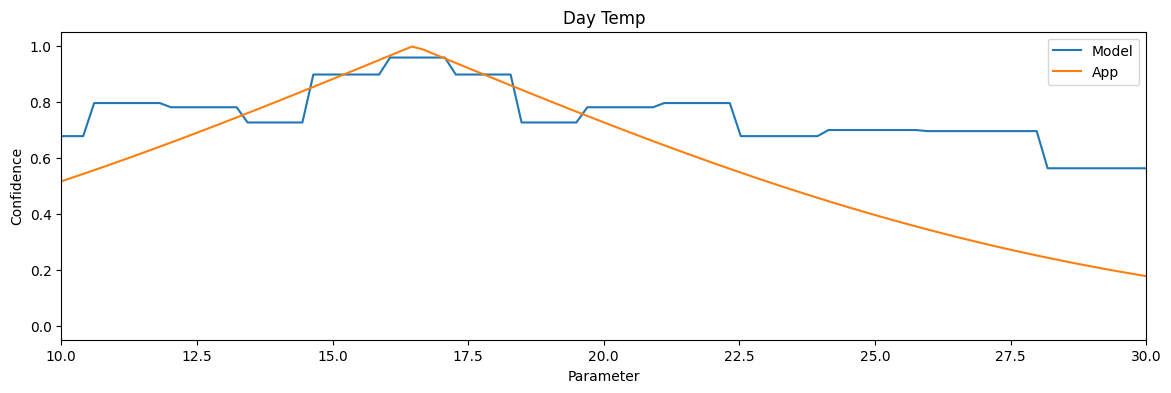

In [103]:
chart_parameter('Day Temp', 'day', true_temp, 10, 30)

In [104]:
#chart_parameter('Eve Temp', 'eve', true_temp, 10, 30)

In [105]:
#chart_parameter('Min Temp', 'min', true_temp, 10, 30)

In [106]:
#chart_parameter('Max Temp', 'max', true_temp, 10, 30)

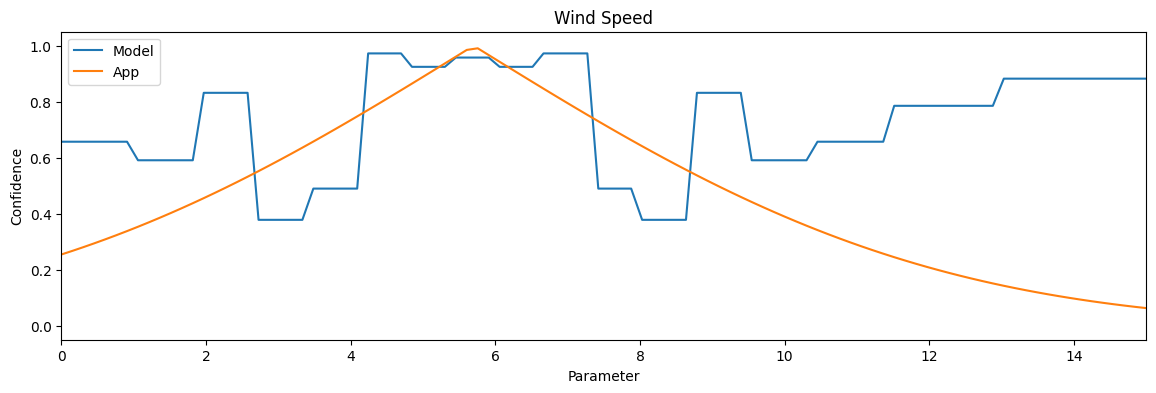

In [107]:
chart_parameter('Wind Speed', 'windSpeed', true_wind, 0, 15)

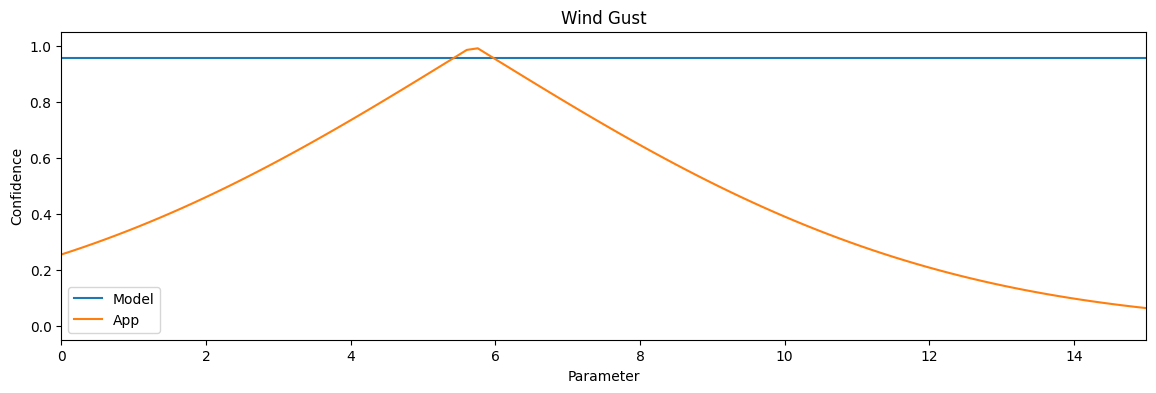

In [108]:
chart_parameter('Wind Gust', 'windGust', true_wind, 0, 15)

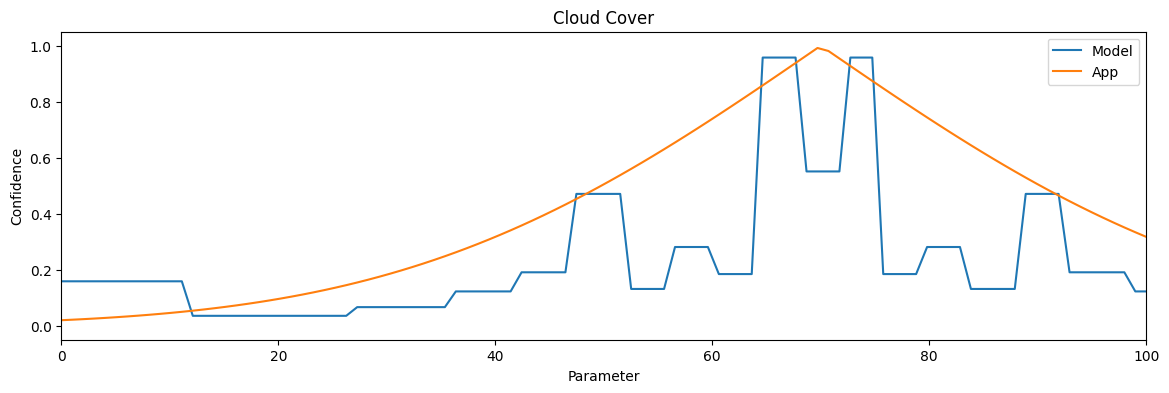

In [109]:
chart_parameter('Cloud Cover', 'cloud', true_cloud, 0, 100)

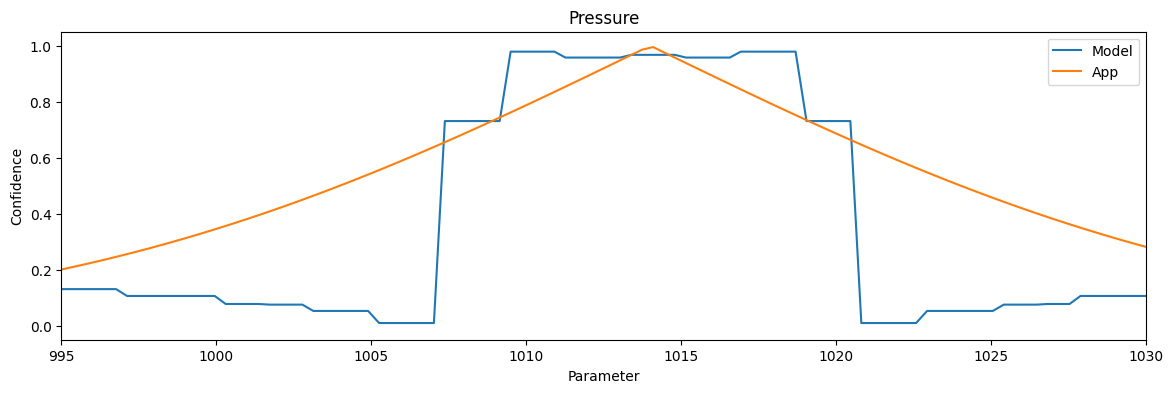

In [110]:
chart_parameter('Pressure', 'press', true_pressure, 995, 1030)

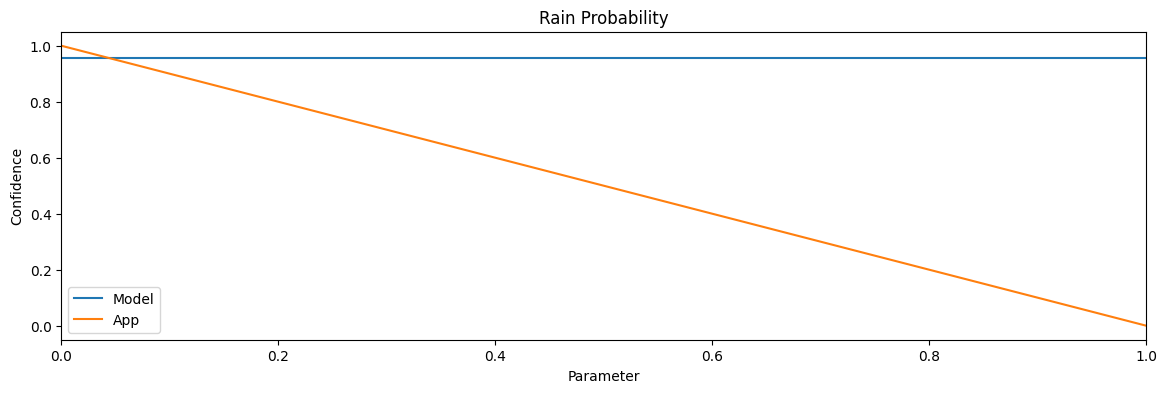

In [111]:
chart_parameter('Rain Probability', 'pop', true_rain, 0, 1)

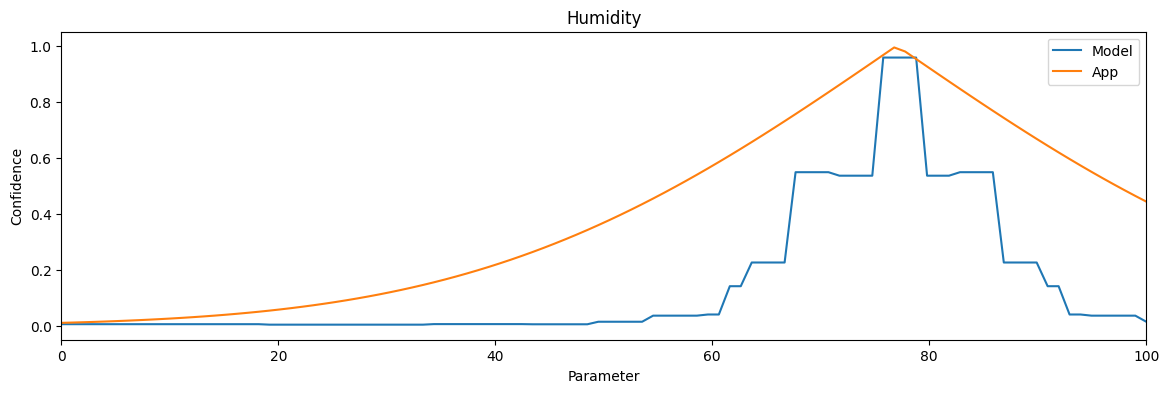

In [112]:
chart_parameter('Humidity', 'humid', true_humidity, 0, 100)

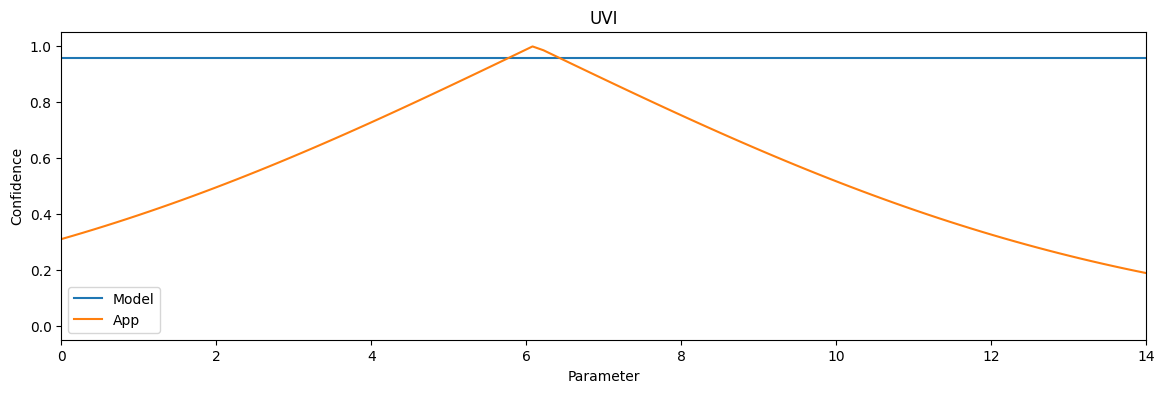

In [113]:
chart_parameter('UVI', 'uvi', true_uvi, 0, 14)

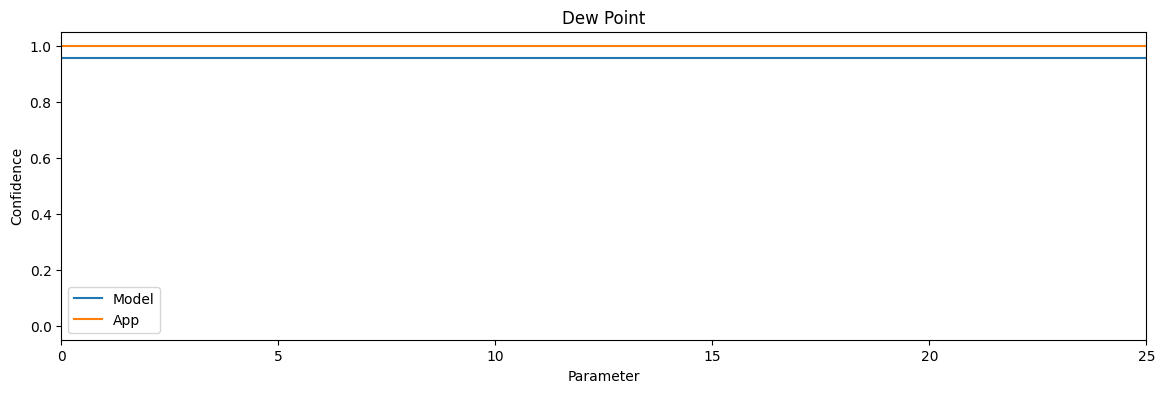

In [114]:
chart_parameter('Dew Point', 'dew_point', true_dewPoint, 0, 25)

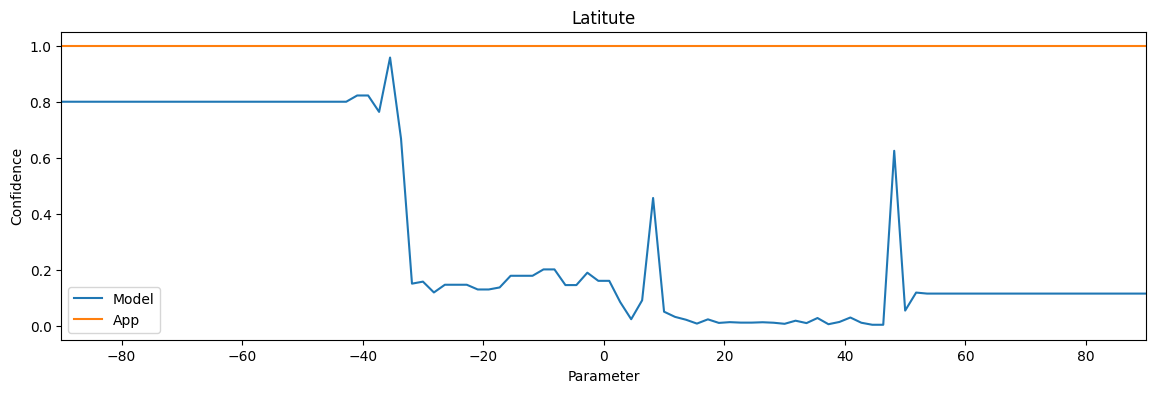

In [115]:
chart_parameter('Latitute', 'lat', true_lat, -90, 90)

In [116]:
from sklearn.datasets import load_diabetes
from sklearn import linear_model, tree
import m2cgen as m2c
import pickle

code = m2c.export_to_dart(automl)

# save the model 
filename = 'final_model8.dart' 
text_file = open(filename, "w")
n = text_file.write(code)
text_file.close()
print(f"Random Forest size: {np.round(os.path.getsize(filename) / 1024 / 1024, 2) } MB")

Random Forest size: 0.41 MB
